# Distributed Representations of Words and Phrases and their Compositionality

# 词和短语的分布表示及其构成

## Abstract

## 摘要

The recently introduced continuous Skip-gram model is an efficient method for learning high-quality distributed vector representations that capture a large number of precise syntactic and semantic word relationships. In this paper we present several extensions that improve both the quality of the vectors and the training speed. By subsampling of the frequent words we obtain significant speedup and also learn more regular word representations. We also describe a simple alternative to the hierarchical softmax called negative sampling.

An inherent limitation of word representations is their indifference to word order and their inability to represent idiomatic phrases. For example, the meanings of “Canada” and “Air” cannot be easily combined to obtain “Air Canada”. Motivated by this example, we present a simple method for finding phrases in text, and show that learning good vector representations for millions of phrases is possible.

最近引入的连续Skip-gram模型是一种有效的学习高质量分布式向量表示的方法，它能够捕获大量精确的句法和语义词汇关系。在本文中，我们提出了一些扩展，以提高向量的质量和训练速度。通过对高频词的子抽样，我们可以获得显著的加速，并学习更多的规则词表示。我们还描述了一种简单的分层softmax，称为负采样。

词汇表征的一个固有局限性是它们对词序的漠不关心和无法表达习语。例如，“加拿大航空公司”和“航空公司”的含义不能很容易地结合起来得到“加拿大航空公司”。在这个例子的启发下，我们提出了一个简单的方法来寻找文本中的短语，并证明了学习数百万个短语的良好向量表示是可能的。

## 1 Introduction

## 1 导言 

Distributed representations of words in a vector space help learning algorithms to achieve better performance in natural language processing tasks by grouping similar words. One of the earliest use of word representations dates back to 1986 due to Rumelhart, Hinton, and Williams [13]. This idea has since been applied to statistical language modeling with considerable success [1]. The follow up work includes applications to automatic speech recognition and machine translation [14, 7], and a wide range of NLP tasks [2, 20, 15, 3, 18, 19, 9].

Recently, Mikolov et al. [8] introduced the Skip-gram model, an efficient method for learning high quality vector representations of words from large amounts of unstructured text data. Unlike most of the previously used neural network architectures for learning word vectors, training of the Skip-gram model (see Figure 1) does not involve dense matrix multiplications. This makes the training extremely efficient: an optimized single-machine implementation can train on more than 100 billion words in one day.

The word representations computed using neural networks are very interesting because the learned vectors explicitly encode many linguistic regularities and patterns. Somewhat surprisingly, many of these patterns can be represented as linear translations. For example, the result of a vector calculation vec(“Madrid”) - vec(“Spain”) + vec(“France”) is closer to vec(“Paris”) than to any other word vector [9, 8].

向量空间中单词的分布式表示有助于学习算法在自然语言处理任务中通过分组相似的单词来获得更好的性能。由于Rumelhart、Hinton和Williams[13]，最早使用单词表示法的时间可以追溯到1986年。这一思想后来被应用到统计语言建模中，并取得了相当大的成功[1]。后续工作包括应用于自动语音识别和机器翻译[14，7]以及广泛的NLP任务[2，20，15，3，18，19，9]。

最近，Mikolov等人。[8] 介绍了一种从大量非结构化文本数据中学习单词高质量矢量表示的有效方法—Skip-gram模型。与以前大多数用于学习词向量的神经网络结构不同，Skip-gram模型（见图1）的训练不涉及密集矩阵乘法。这使得训练非常有效：一个优化的单机实现可以在一天内训练超过1000亿字。

使用神经网络计算的单词表示非常有趣，因为学习向量显式地编码了许多语言规则和模式。有些令人惊讶的是，这些模式中的许多可以表示为线性翻译。例如，向量计算vec（“马德里”）-vec（“西班牙”）+vec（“法国”）的结果比任何其他词向量[9，8]更接近vec（“巴黎”）。

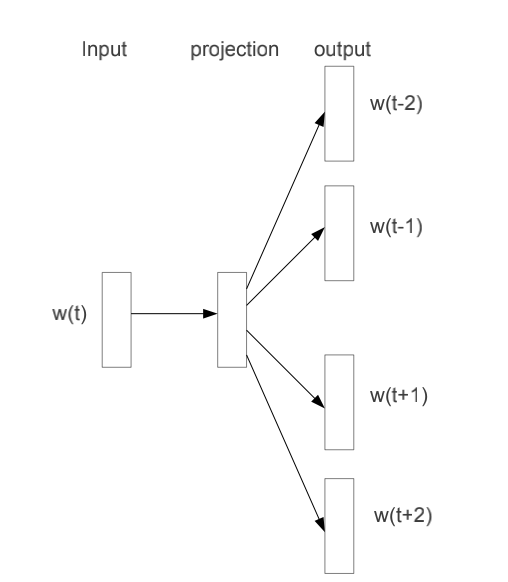

Figure 1: The Skip-gram model architecture. The training objective is to learn word vector representations that are good at predicting the nearby words.

图1：Skip-gram 模型架构。训练目标是学习能够预测邻近单词的单词向量表示。

In this paper we present several extensions of the original Skip-gram model. We show that subsampling of frequent words during training results in a significant speedup (around 2x - 10x), and improves accuracy of the representations of less frequent words. In addition, we present a simplified variant of Noise Contrastive Estimation (NCE) [4] for training the Skip-gram model that results in faster training and better vector representations for frequent words, compared to more complex hierarchical softmax that was used in the prior work [8].

Word representations are limited by their inability to represent idiomatic phrases that are not compositions of the individual words. For example, “Boston Globe” is a newspaper, and so it is not a natural combination of the meanings of “Boston” and “Globe”. Therefore, using vectors to represent the whole phrases makes the Skip-gram model considerably more expressive. Other techniques that aim to represent meaning of sentences by composing the word vectors, such as the recursive autoencoders [15], would also benefit from using phrase vectors instead of the word vectors.

The extension from word based to phrase based models is relatively simple. First we identify a large number of phrases using a data-driven approach, and then we treat the phrases as individual tokens during the training. To evaluate the quality of the phrase vectors, we developed a test set of analogical reasoning tasks that contains both words and phrases. A typical analogy pair from our test set is “Montreal”:“Montreal Canadiens”::“Toronto”:“Toronto Maple Leafs”. It is considered to have been answered correctly if the nearest representation to vec(“Montreal Canadiens”) - vec(“Montreal”) + vec(“Toronto”) is vec(“Toronto Maple Leafs”).

Finally, we describe another interesting property of the Skip-gram model. We found that simple vector addition can often produce meaningful results. For example, vec(“Russia”) + vec(“river”) is close to vec(“Volga River”), and vec(“Germany”) + vec(“capital”) is close to vec(“Berlin”). This compositionality suggests that a non-obvious degree of language understanding can be obtained by using basic mathematical operations on the word vector representations.

本文给出了原Skip-gram模型的几个扩展。结果表明，在训练过程中对频繁词进行下采样，可以显著提高训练速度（约为2x-10x），提高了较少频繁词表示的准确性。此外，我们还提出了一种简化的噪声对比估计（NCE）[4]方法，用于训练Skip-gram模型，与先前工作中使用的更复杂的分层Softmax相比，该方法能够更快地训练频繁词，并获得更好的向量表示。

单词的表达能力受到了限制，因为它们不能表示不是单个单词的共同位置的惯用短语。例如，“波士顿环球报”是一份报纸，因此它不是“波士顿”和“环球”的自然组合。因此，使用向量来重复发送整个短语，使得Skip-gram模型更具表现力。其他旨在通过组合词向量来表示句子意思的技术，例如递归自动编码器[15]，也将受益于使用短语向量而不是词向量。

从基于词的模型扩展到基于短语的模型相对简单。首先我们使用数据驱动的方法识别大量短语，然后在训练期间将短语视为单个标记。为了评估短语向量的质量，我们开发了一个包含单词和短语的类比推理任务测试集。我们测试集中的一个典型类比对是“Montreal”：“Montreal Canadiens”：“Toronto”：“Toronto Maple Leafs”。如果vec（“蒙特利尔加拿大人”）-vec（“蒙特利尔”）+vec（“多伦多”）的最近代表是vec（“多伦多枫叶”），则认为答案正确。

最后，我们描述了Skip-gram模型的另一个有趣的性质。我们发现简单的向量加法通常可以产生有意义的结果。例如，vec（“俄罗斯”）+vec（“河流”）靠近vec（“伏尔加河”），vec（“德国”）+vec（“首都”）靠近vec（“柏林”）。这个成分性表明，通过对词向量表示的基本数学运算，可以获得不明显的语言理解程度。

### 2 The Skip-gram Model

### 2 Skip-gram模型

The training objective of the Skip-gram model is to find word representations that are useful for predicting the surrounding words in a sentence or a document. More formally, given a sequence of raining words w1, w2, w3, . . . , wT , the objective of the Skip-gram model is to maximize the average log probability

Skip-gram模型的训练目标是寻找有助于预测句子或文档中周围单词的单词表示法。更正式地说，给定一连串单词w1，w2，w3。，wT，Skip-gram模型的目标是最大化平均对数概率

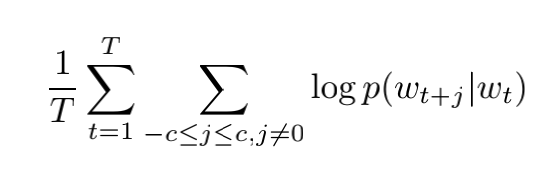

where c is the size of the training context (which can be a function of the center word wt). Larger c results in more training examples and thus can lead to a higher accuracy, at the expense of the training time. The basic Skip-gram formulation defines p(wt+j |wt) using the softmax function:

其中c是训练上下文的大小（可以是中心词wt的函数）。较大的c会产生更多的训练示例，因此可以导致更高的精度，但会牺牲训练时间。基本Skip-gram公式使用softmax函数定义p（wt+j | wt）：

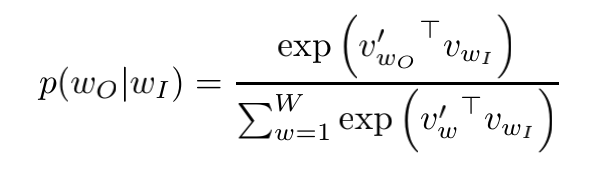

where Vw and V'w are the “input” and “output” vector representations of w, and W is the number of words in the vocabulary. This formulation is impractical because the cost of computing
∇ log p(wO|wI ) is proportional to W, which is often large (105–107
terms).

其中 Vw 和V'w是w的“输入”和“输出”向量表示，W是词汇表中单词的数量。这个公式是不切实际的，因为计算∇logp（wO | wI）的成本与W成正比，而W通常很大（105–107terms）。

### 2.1 Hierarchical Softmax

### 2.1 分层softmax

A computationally efficient approximation of the full softmax is the hierarchical softmax. In the context of neural network language models, it was first introduced by Morin and Bengio [12]. The main advantage is that instead of evaluating W output nodes in the neural network to obtain the probability distribution, it is needed to evaluate only about log2(W) nodes.

The hierarchical softmax uses a binary tree representation of the output layer with the W words as its leaves and, for each node, explicitly represents the relative probabilities of its child nodes. These define a random walk that assigns probabilities to words.

More precisely, each word w can be reached by an appropriate path from the root of the tree. Let n(w, j) be the j-th node on the path from the root to w, and let L(w) be the length of this path, so n(w, 1) = root and n(w, L(w)) = w. In addition, for any inner node n, let ch(n) be an arbitrary fixed child of n and let [[x]] be 1 if x is true and -1 otherwise. Then the hierarchical softmax defines p(wO|wI ) as follows:


全softmax的计算效率近似为分层softmax。在神经网络语言模型的背景下，它首先由Morin和Bengio提出[12]。它的主要优点是不需要计算网络中W个输出节点的概率分布，而只需要估计log2（W）个节点。

分层的softmax使用输出层的二叉树表示，W个单词作为其叶子，并且对于每个节点，显式地表示其子节点的相对概率。这些定义了一个随机游走，它为单词分配概率。

更确切地说，每个单词w都可以通过从树的根开始的适当路径到达。设n（w，j）是从根到w的路径上的第j个节点，L（w）是该路径的长度，因此n（w，1）=root，n（w，L（w））=w。此外，对于任何内部节点n，设ch（n）是任意的修正了n的子元素，如果x为真，则让[[x]]为1，否则为-1。然后，分层的softmax定义p（wO | wI）如下：

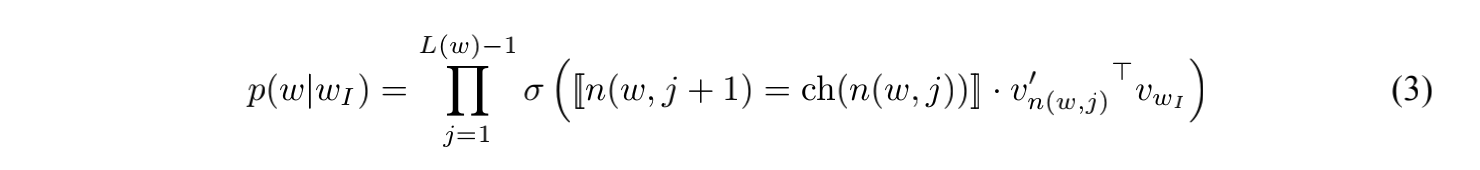

where σ(x) = 1/(1 + exp( x)). It can be verified that sigma W w=1 p(w|wI ) = 1. This implies that the cost of computing log p(wO|wI ) and ∇ log p(wO|wI ) is proportional to L(wO), which on average is no greater than log W. Also, unlike the standard softmax formulation of the Skip-gram which assigns two representations vw and v′w to each word w, the hierarchical softmax formulation has one representation vw for each word w and one representation v′n for every inner node n of the binary tree.


The structure of the tree used by the hierarchical softmax has a considerable effect on the performance. Mnih and Hinton explored a number of methods for constructing the tree structure and the effect on both the training time and the resulting model accuracy [10]. In our work we use a binary Huffman tree, as it assigns short codes to the frequent words which results in fast training. It has been observed before that grouping words together by their frequency works well as a very simple speedup technique for the neural network based language models [5, 8].

式中σ（x）=1/（1+exp（x））。可以验证sigma W w=1 = p（w | wI）=1。这意味着计算log p（wO | wI）和∇log p（wO | wI）的成本与L（wO）成正比，平均不大于logw W。此外，与Skip-gram的标准softmax公式不同，Skip-gram为每个单词W指定两个表示Vw和V′W，分层softmax公式对每个单词W有一个表示Vw二叉树的每个内部节点n有一个表示V′n。

分层softmax使用的树结构对性能有很大影响。Mnih和Hinton探索了许多构建树结构的方法，以及对训练时间和由此产生的模型精度的影响[10]。在我们的工作中，我们使用了一个二叉哈夫曼树，因为它为频繁的单词分配短代码，从而导致快速训练。以前有人观察到，按频率将单词组合在一起是非常简单的基于神经网络的语言模型加速技术[5,8]。

### 2.2 Negative Sampling

## 2.2 负采样

An alternative to the hierarchical softmax is Noise Contrastive Estimation (NCE), which was introduced by Gutmann and Hyvarinen [4] and applied to language modeling by Mnih and Teh [11]. NCE posits that a good model should be able to differentiate data from noise by means of logistic regression. This is similar to hinge loss used by Collobert and Weston [2] who trained the models by ranking the data above noise.

While NCE can be shown to approximately maximize the log probability of the softmax, the Skip-gram model is only concerned with learning high-quality vector representations, so we are free to simplify NCE as long as the vector representations retain their quality. We define Negative sampling (NEG) by the objective

在[11]和[2]中，由[11]和[2]对语言进行了对比分析。NCE认为一个好的模型应该能够通过logistic回归来区分数据和噪声。这与Collobert和Weston[2]使用的铰链损耗相似，他们通过将数据排序在噪声之上来训练模型。

虽然NCE可以近似地使softmax的对数概率最大化，但是Skip-gram模型只关心学习高质量的向量表示，因此只要向量表示保持质量，我们就可以自由地简化NCE。我们定义了负抽样（NEG）的目标

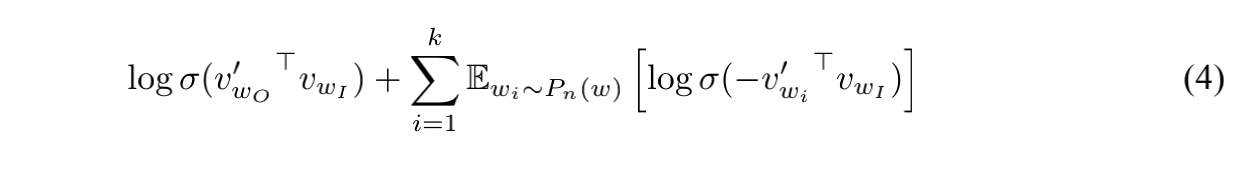

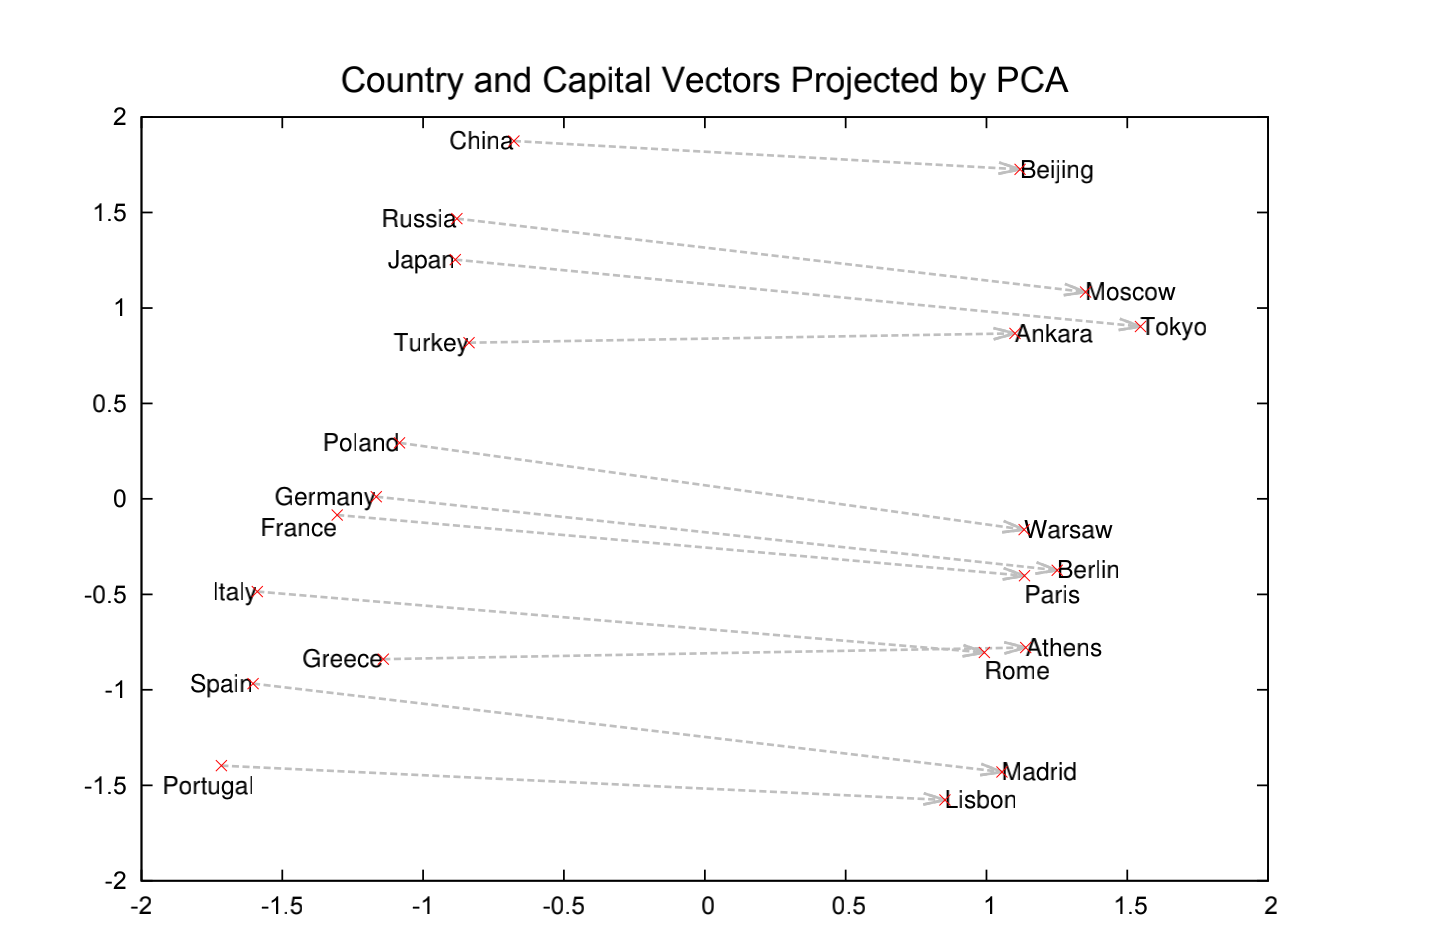

Figure 2: Two-dimensional PCA projection of the 1000-dimensional Skip-gram vectors of countries and their capital cities. The figure illustrates ability of the model to automatically organize concepts and learn implicitly the relationships between them, as during the training we did not provide any supervised information about what a capital city means.

图2：各国及其首都城市1000维Skip-gram矢量的二维PCA投影。该图说明了模型自动组织概念并隐含地学习它们之间关系的能力，因为在训练期间，我们没有提供任何关于首都含义的监督信息。

which is used to replace every log P(wO|wI ) term in the Skip-gram objective. Thus the task is to distinguish the target word wO from draws from the noise distribution Pn(w) using logistic regression, where there are k negative samples for each data sample. Our experiments indicate that values of k in the range 5–20 are useful for small training datasets, while for large datasets the k can be as small as 2-5. The main difference between the Negative sampling and NCE is that NCE needs both samples and the numerical probabilities of the noise distribution, while Negative sampling uses only samples. And while NCE approximately maximizes the log probability of the softmax, this property is not important for our application.

Both NCE and NEG have the noise distribution Pn(w) as a free parameter. We investigated a number of choices for Pn(w) and found that the unigram distribution U(w) raised to the 3/4rd power (i.e., U(w)3/4/Z) outperformed significantly the unigram and the uniform distributions, for both NCE and NEG on every task we tried including language modeling (not reported here).

它用于替换Skip-gram目标中的每个log P（wO | wI）项。因此，任务是使用logistic回归从噪声分布Pn（w）中区分目标词wO和draws，其中每个数据样本有k个负样本。我们的实验表明，在5-20范围内的k值对于小的训练数据集是有用的，而对于大数据集，k值可以小到2-5。负采样和随机抽样的主要区别在于，负采样只需要样本和噪声分布的数值概率，而负采样只需要样本。当NCE近似地使softmax的对数概率最大化时，这个性质对于我们的应用并不重要。

噪声分布Pn（w）作为自由参数，具有噪声分布。我们调查了许多Pn（w）的选择，发现在我们尝试的每个任务（包括语言建模）中，提高到3/4次方（即U（w）3/4/Z）的unigram分布U（w）显著优于unigram和unigram分布，包括语言建模（此处未报告）。

### 2.3 Subsampling of Frequent Words

### 2.3 频繁词的子抽样

In very large corpora, the most frequent words can easily occur hundreds of millions of times (e.g., “in”, “the”, and “a”). Such words usually provide less information value than the rare words. For example, while the Skip-gram model benefits from observing the co-occurrences of “France” and “Paris”, it benefits much less from observing the frequent co-occurrences of “France” and “the”, as nearly every word co-occurs frequently within a sentence with “the”. This idea can also be applied in the opposite direction; the vector representations of frequent words do not change significantly after training on several million examples.

To counter the imbalance between the rare and frequent words, we used a simple subsampling approach: each word wi in the training set is discarded with probability computed by the formula where f(wi) is the frequency of word wi and t is a chosen threshold, typically around 10 5. We chose this subsampling formula because it aggressively subsamples words whose frequency is greater than t while preserving the ranking of the frequencies. Although this subsampling formula was chosen heuristically, we found it to work well in practice. It accelerates learning and even significantly improves the accuracy of the learned vectors of the rare words, as will be shown in the following sections.

在非常大的语料库中，最常见的词很容易出现数亿次（例如“In”、“the”和“a”）。这些词通常比稀有词提供较少的信息价值。例如，尽管Skip-gram模型从观察“France”和“Paris”的共现情况中获益匪浅，但它从观察“France”和“the”的频繁共现中获益甚微，因为几乎每个单词都频繁地与“the”同时出现在一个句子中。这一思想也可以反其道而行之；在对数百万个例子进行训练后，高频单词的向量表示并没有显著变化。

为了克服稀有词和高频词之间的不平衡，我们使用了一种简单的子抽样方法：训练集中的每个词wi都被丢弃，其概率由公式计算得出，其中f（wi）是单词wi的频率，t是一个选择的阈值，通常在10 5左右。我们选择这个子抽样公式是因为它积极地对频率大于t的单词进行子抽样，同时保持频率的排序。虽然这个公式的子抽样是经过试探性选择的，但我们发现它在实践中效果良好。它加速了学习，甚至显著提高了稀有单词的学习向量的准确性，如下节所示。

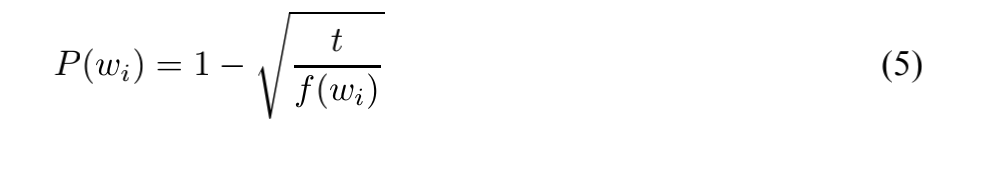

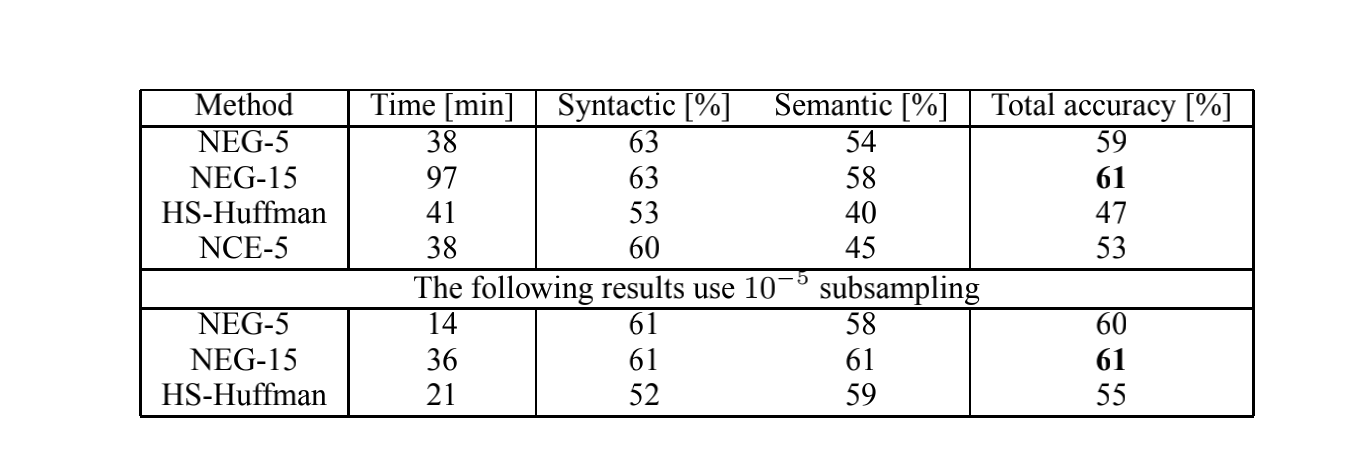

Table 1: Accuracy of various Skip-gram 300-dimensional models on the analogical reasoning task
as defined in [8]. NEG-k stands for Negative Sampling with k negative samples for each positive
sample; NCE stands for Noise Contrastive Estimation and HS-Huffman stands for the Hierarchical
Softmax with the frequency-based Huffman codes.

表1：各种Skip-gram 300维模型在[8]中定义的类比推理任务上的精度。NEG-k代表负采样，每个正样本有k个负样本；NCE代表噪声对比估计，HS-Huffman代表基于频率的Huffman码的分层Softmax。

### 3 Empirical Results

### 3 实证结果

In this section we evaluate the Hierarchical Softmax (HS), Noise Contrastive Estimation, Negative Sampling, and subsampling of the training words. We used the analogical reasoning task1 introduced by Mikolov et al. [8]. The task consists of analogies such as “Germany” : “Berlin” :: “France” : ?, which are solved by finding a vector x such that vec(x) is closest to vec(“Berlin”) - vec(“Germany”) + vec(“France”) according to the cosine distance (we discard the input words from the search). This specific example is considered to have been answered correctly if x is “Paris”. The task has two broad categories: the syntactic analogies (such as “quick” : “quickly” :: “slow” : “slowly”) and the semantic analogies, such as the country to capital city relationship.

For training the Skip-gram models, we have used a large dataset consisting of various news articles (an internal Google dataset with one billion words). We discarded from the vocabulary all words that occurred less than 5 times in the training data, which resulted in a vocabulary of size 692K. The performance of various Skip-gram models on the word analogy test set is reported in Table 1. The table shows that Negative Sampling outperforms the Hierarchical Softmax on the analogical reasoning task, and has even slightly better performance than the Noise Contrastive Estimation. The subsampling of the frequent words improves the training speed several times and makes the word representations significantly more accurate.

It can be argued that the linearity of the skip-gram model makes its vectors more suitable for such linear analogical reasoning, but the results of Mikolov et al. [8] also show that the vectors learned by the standard sigmoidal recurrent neural networks (which are highly non-linear) improve on this task significantly as the amount of the training data increases, suggesting that non-linear models also have a preference for a linear structure of the word representations.

在这一部分中，我们评估了训练词的分层Softmax（HS）、噪声对比估计、负采样和子抽样。我们使用了Mikolov等人提出的类比推理任务1[8] 。这项任务包括类似的“德国”：“柏林”：“法国”：？，通过找到一个向量x来求解，使得vec（x）最接近vec（“Berlin”）-vec（“Germany”）+vec（“France”），根据余弦距离（我们丢弃搜索中的输入词）。如果x是“Paris”，则认为这个特定示例的答案正确。任务分为两大类：句法类比（如“quick”：“快”：“quickly”：“slow”：“slowly”）和语义类比，如国家与首都的关系。

为了训练Skip-gram模型，我们使用了一个由各种新闻文章组成的大型数据集（一个10亿字的Google内部数据集）。我们从词汇表中剔除所有在训练数据中出现不到5次的单词，得到了692K大小的词汇表。表1报告了各种Skip-gram模型在单词模拟测试集上的性能。从表中可以看出，在类比推理任务上，负采样的性能优于分层Softmax，甚至比噪声对比估计的性能稍好。高频词的二次抽样使训练速度提高了几倍，使词的表示更加准确。

可以说，Skip-gram模型的线性使得其向量更适合于这种线性类比推理，但是Mikolov等人的结果。[8] 同时也表明，随着训练数据量的增加，由标准的sigmoid 递归神经网络（高度非线性）学习的向量在这个任务上有显著的改善，这表明非线性模型也倾向于词表示的线性结构。

### 4 Learning Phrases

### 4 学习短语

As discussed earlier, many phrases have a meaning that is not a simple composition of the meanings of its individual words. To learn vector representation for phrases, we first find words that appear frequently together, and infrequently in other contexts. For example, “New York Times” and “Toronto Maple Leafs” are replaced by unique tokens in the training data, while a bigram “this is” will remain unchanged.

如前所述，许多短语的含义并不是单个单词的意思的简单组合。为了学习短语的向量表示法，我们首先要找出那些经常出现在一起，而在其他上下文中很少出现的单词。例如，“纽约时报”和“多伦多枫叶”将被训练数据中的唯一标记替换，而bigram“this is”将保持不变。

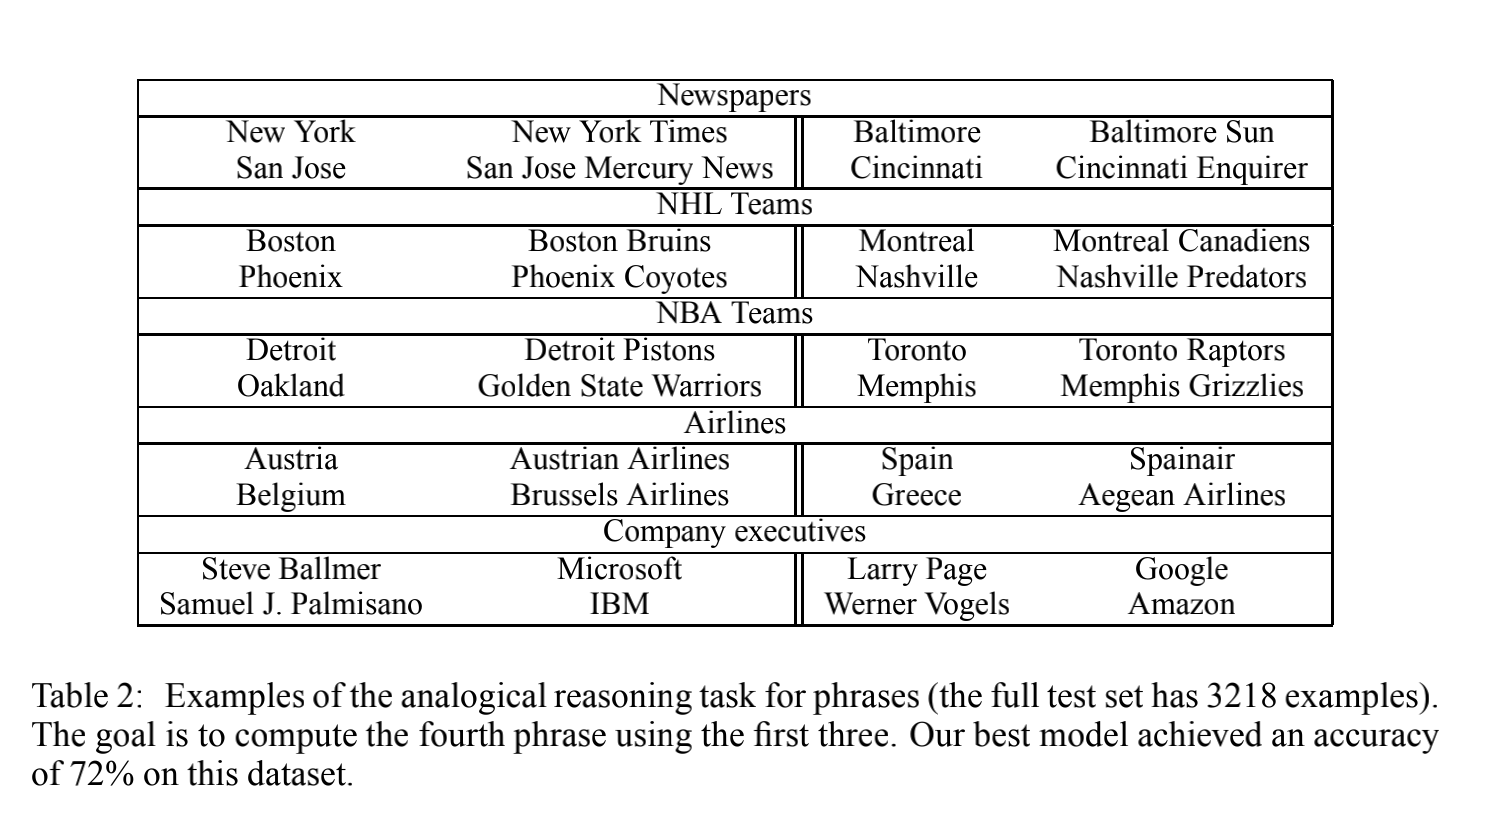

表2：短语类比推理任务示例（完整测试集有3218个示例）。目标是使用前三个短语来计算第四个短语。我们的最佳模型在这个数据集上达到了72%的准确率。

This way, we can form many reasonable phrases without greatly increasing the size of the vocabulary; in theory, we can train the Skip-gram model using all n-grams, but that would be too memory intensive. Many techniques have been previously developed to identify phrases in the text; however, it is out of scope of our work to compare them. We decided to use a simple data-driven approach, where phrases are formed based on the unigram and bigram counts, using

通过这种方式，我们可以在不大幅增加词汇量的情况下形成许多合理的短语；理论上，我们可以使用所有的n-gram来训练Skip-gram模型，但这会占用太多的内存。然而，在我们之前的工作范围之外，我们已经开发了许多技术来比较它们。我们决定使用一种简单的数据驱动方法，在这种方法中，短语是根据单字图和二元数组成的，使用

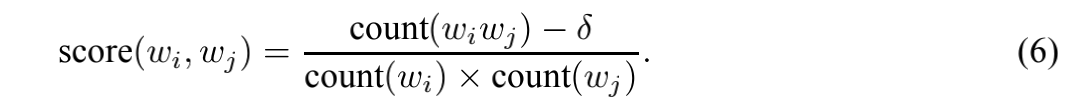

The δ is used as a discounting coefficient and prevents too many phrases consisting of very infrequent words to be formed. The bigrams with score above the chosen threshold are then used as phrases. Typically, we run 2-4 passes over the training data with decreasing threshold value, allowing longer phrases that consists of several words to be formed. We evaluate the quality of the phrase representations using a new analogical reasoning task that involves phrases. Table 2 shows examples of the five categories of analogies used in this task. This dataset is publicly available on the web2.

δ用作折现系数，防止形成太多由非常罕见的单词组成的短语。分数高于所选阈值的二元组被用作短语。通常情况下，我们用降低阈值的方法对训练数据进行2-4次传递，允许形成由多个单词组成的较长短语。我们使用一个新的包含短语的类比推理任务来评估短语表征的质量。表2展示了这项任务中使用的五类类比的例子。此数据集在web2上公开可用。

### 4.1 Phrase Skip-Gram Results

### 4.1 skip-gram 短语结果

Starting with the same news data as in the previous experiments, we first constructed the phrase based training corpus and then we trained several Skip-gram models using different hyperparameters. As before, we used vector dimensionality 300 and context size 5. This setting already achieves good performance on the phrase dataset, and allowed us to quickly compare the Negative Sampling and the Hierarchical Softmax, both with and without subsampling of the frequent tokens. The results are summarized in Table 3.

The results show that while Negative Sampling achieves a respectable accuracy even with k = 5, using k = 15 achieves considerably better performance. Surprisingly, while we found the Hierarchical Softmax to achieve lower performance when trained without subsampling, it became the best performing method when we downsampled the frequent words. This shows that the subsampling can result in faster training and can also improve accuracy, at least in some cases.

从相同的新闻数据开始，我们首先构建基于短语的训练语料库，然后使用不同的超参数训练多个跳转语法模型。如前所述，我们使用向量维数300和上下文大小5。这个设置已经在短语数据集上取得了很好的性能，并且允许我们快速比较负采样和分层Softmax，无论是否对频繁标记进行子采样。结果汇总在表3中。

结果表明，虽然负采样即使在k=5时也能达到令人满意的精度，使用k=15可以获得相当好的性能。令人惊讶的是，虽然我们发现分层别致的Softmax在没有子抽样的情况下训练时取得了较低的性能，但当我们减少频繁单词的抽样时，它成为了最好的执行方法。这表明，子抽样可以导致更快的训练，也可以提高准确性，至少在某些情况下。

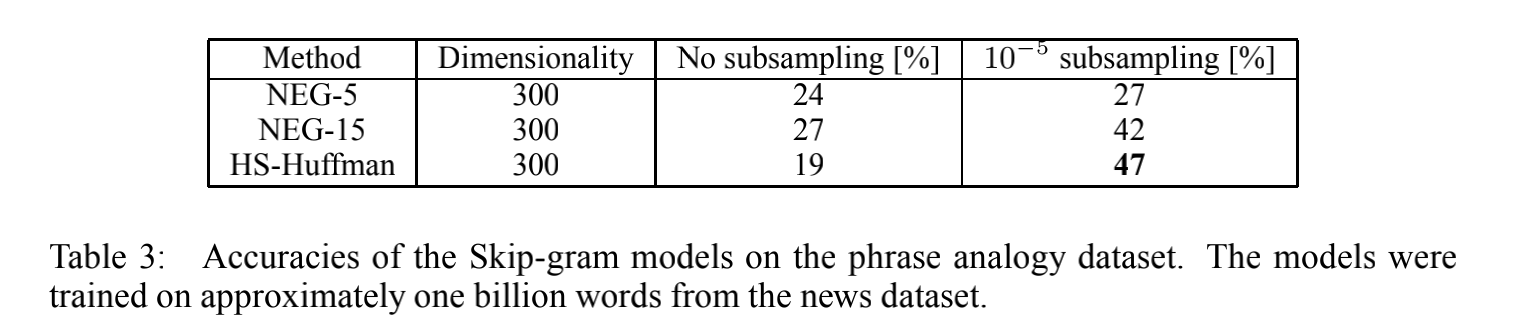

表3：短语类比数据集上的跳过语法模型的精确度。这些模型是根据新闻数据集中大约10亿个单词进行训练的。

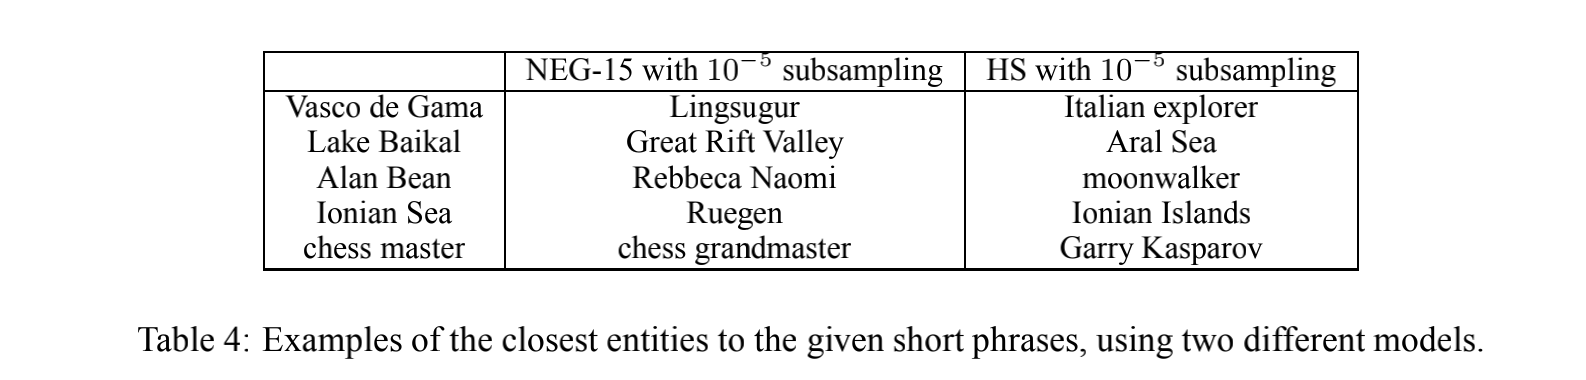

表4：使用两种不同的模型，给出最接近给定短短语的实体示例。

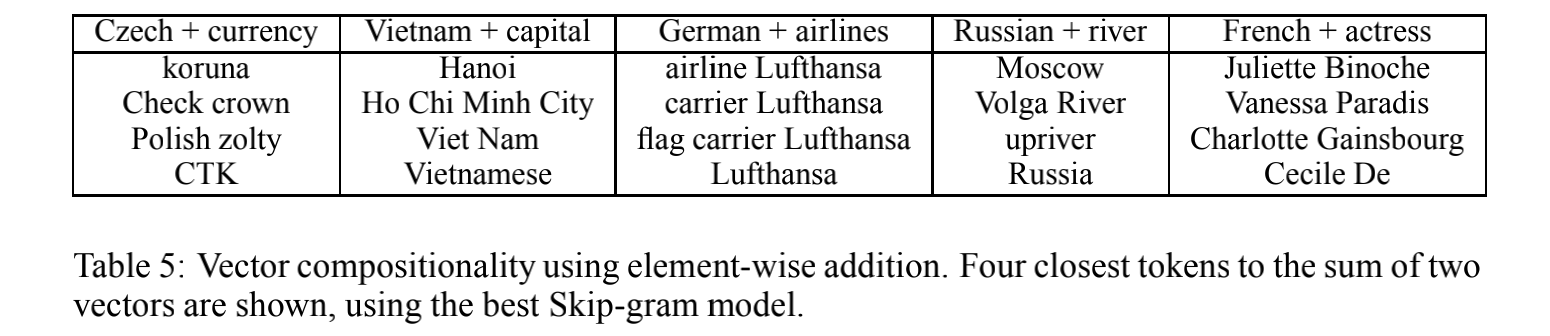

表5：使用元素加法的向量组成。使用最佳跳过gram模型，显示了四个最接近两个向量之和的标记。

To maximize the accuracy on the phrase analogy task, we increased the amount of the training data by using a dataset with about 33 billion words. We used the hierarchical softmax, dimensionality of 1000, and the entire sentence for the context. This resulted in a model that reached an accuracy of 72%. We achieved lower accuracy 66% when we reduced the size of the training dataset to 6B words, which suggests that the large amount of the training data is crucial.

To gain further insight into how different the representations learned by different models are, we did inspect manually the nearest neighbours of infrequent phrases using various models. In Table 4, we show a sample of such comparison. Consistently with the previous results, it seems that the best representations of phrases are learned by a model with the hierarchical softmax and subsampling.

为了最大限度地提高短语类比任务的准确性，我们使用了一个约330亿字的数据集来增加训练数据量。我们使用层次结构的softmax，维数1000，以及整个句子作为上下文。这使得模型的精确度达到了72%。当我们将训练数据集的大小缩小到6B字时，我们的准确率降低了66%，这说明大量的训练数据是至关重要的。

为了更深入地了解不同模型所学习到的表示的不同，我们使用不同的模型手工检查了不常见短语的最近邻。在表4中，我们展示了这种比较的一个示例。与前面的结果一致，似乎短语的最佳表示是通过一个分层的softmax和子抽样模型来学习的。

### 5 Additive Compositionality

### 5 加性成分

We demonstrated that the word and phrase representations learned by the Skip-gram model exhibit a linear structure that makes it possible to perform precise analogical reasoning using simple vector arithmetics. Interestingly, we found that the Skip-gram representations exhibit another kind of linear structure that makes it possible to meaningfully combine words by an element-wise addition of their vector representations. This phenomenon is illustrated in Table 5.

The additive property of the vectors can be explained by inspecting the training objective. The word vectors are in a linear relationship with the inputs to the softmax nonlinearity. As the word vectors are trained to predict the surrounding words in the sentence, the vectors can be seen as representing the distribution of the context in which a word appears. These values are related logarithmically to the probabilities computed by the output layer, so the sum of two word vectors is related to the product of the two context distributions. The product works here as the AND function: words that are assigned high probabilities by both word vectors will have high probability, and the other words will have low probability. Thus, if “Volga River” appears frequently in the same sentence together with the words “Russian” and “river”, the sum of these two word vectors will result in such a feature vector that is close to the vector of “Volga River”.

我们证明了由Skip-gram模型学习的单词和短语表示呈现出线性结构，这使得使用简单的向量算法进行精确的类比推理成为可能。有趣的是，我们发现Skip-gram表现出另一种线性结构，这使得通过对单词的向量表示进行元素级加法来有意义地组合单词成为可能。这一现象如表5所示。

通过对训练目标的检验，可以解释向量的加性。单词向量与softmax非线性的输入呈线性关系。当单词向量被训练来预测句子中的周围单词时，向量可以被看作是一个单词出现的上下文的分布。这些值与输出层计算的概率成对数关系，因此两个词向量的和与两个上下文分布的乘积有关。这个产品在这里起作用的是AND函数：两个词向量赋予高概率的词将具有高概率，而其他词则具有低概率。因此，如果“伏尔加河”与“俄罗斯人”和“河”在同一句话中频繁出现，这两个词向量之和将产生一个与“伏尔加河”向量相近的特征向量。

### 6 Comparison to Published Word Representations

### 6 与已发布单词表示法的比较

Many authors who previously worked on the neural network based representations of words have published their resulting models for further use and comparison: amongst the most well known authors are Collobert and Weston [2], Turian et al. [17], and Mnih and Hinton [10]. We downloaded their word vectors from the web3. Mikolov et al. [8] have already evaluated these word representations on the word analogy task, where the Skip-gram models achieved the best performance with a huge margin.

许多以前致力于基于神经网络的单词表示的作者已经发表了他们的结果模型以供进一步使用和比较：在最著名的au  thors中，Collobert和Weston[2]，Turian等人。[17] ，以及Mnih和Hinton[10]。我们从web3下载了他们的单词向量。Mikolov等人。[8] 已经在单词类比任务中评估了这些单词表示，其中Skip-gram模型以巨大的优势获得了最佳性能。

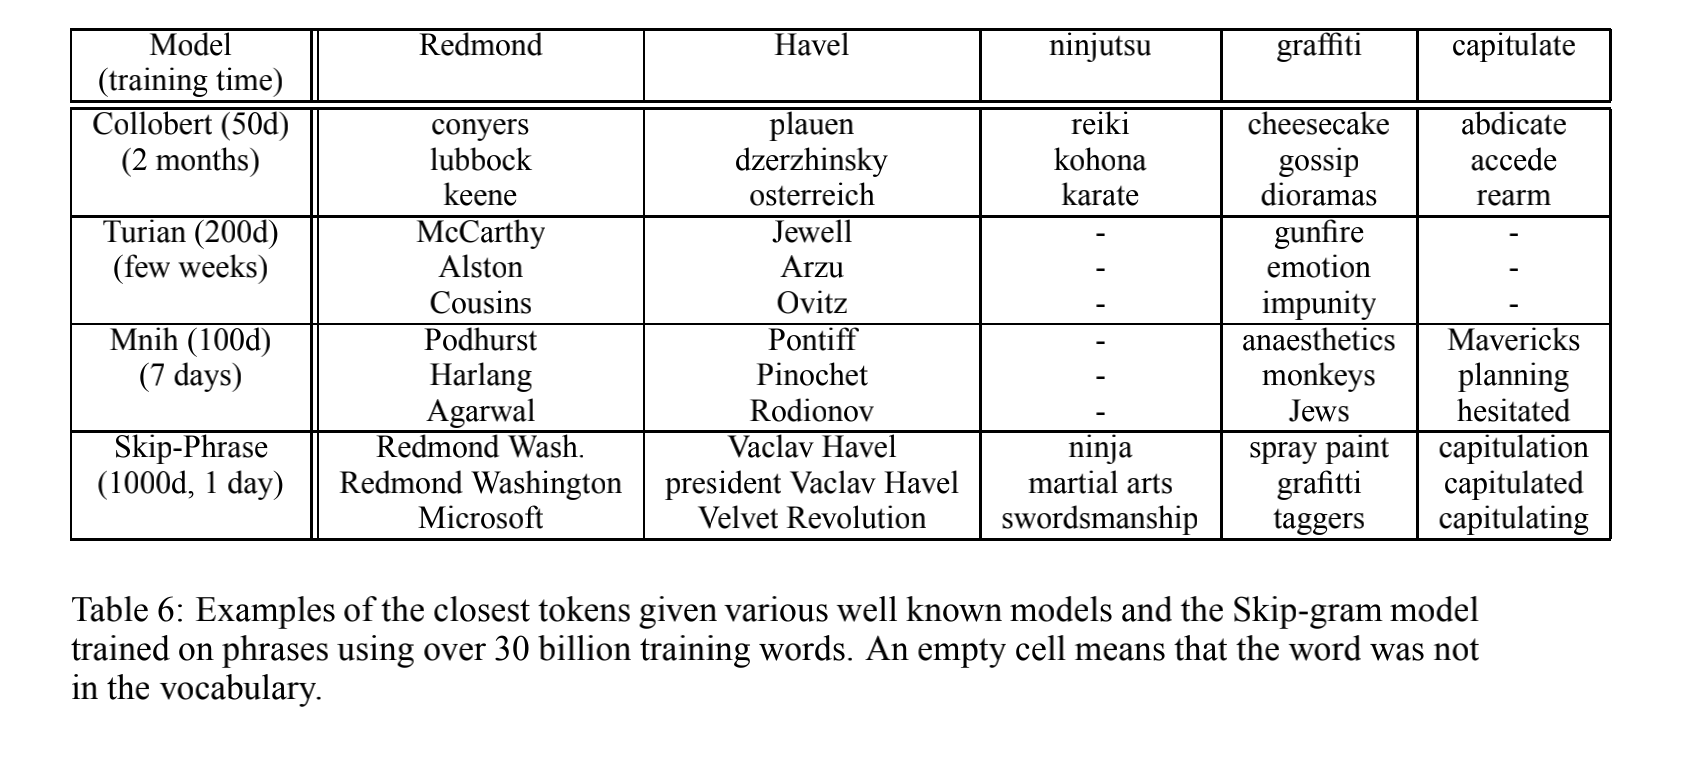

表6：给出了各种已知模型的最接近标记的示例，以及使用超过300亿个训练单词训练短语的Skip gram模型。空单元格表示单词不在词汇表中。

To give more insight into the difference of the quality of the learned vectors, we provide empirical comparison by showing the nearest neighbours of infrequent words in Table 6. These examples show that the big Skip-gram model trained on a large corpus visibly outperforms all the other models in the quality of the learned representations. This can be attributed in part to the fact that this model has been trained on about 30 billion words, which is about two to three orders of magnitude more data than the typical size used in the prior work. Interestingly, although the training set is much larger, the training time of the Skip-gram model is just a fraction of the time complexity required by the previous model architectures.

为了更深入地了解学习向量质量的差异，我们通过在表6中显示不常见单词的最近邻来进行实证比较。这些例子表明，在大语料库上训练的大跳转模型在学习表征质量上明显优于其他模型。这在一定程度上可以归因于这样一个事实，即该模型已经训练了大约300亿字，这比先前工作中使用的典型大小多了大约2到3个数量级的数据。有趣的是，尽管训练集要大得多，但是Skip-gram模型的训练时间只是以前模型体系结构所需时间复杂度的一小部分。

### 7 Conclusion

### 7 结论

This work has several key contributions. We show how to train distributed representations of words and phrases with the Skip-gram model and demonstrate that these representations exhibit linear structure that makes precise analogical reasoning possible. The techniques introduced in this paper can be used also for training the continuous bag-of-words model introduced in [8].

We successfully trained models on several orders of magnitude more data than the previously published models, thanks to the computationally efficient model architecture. This results in a great improvement in the quality of the learned word and phrase representations, especially for the rare entities. We also found that the subsampling of the frequent words results in both faster training and significantly better representations of uncommon words. Another contribution of our paper is the Negative sampling algorithm, which is an extremely simple training method that learns accurate representations especially for frequent words.

The choice of the training algorithm and the hyper-parameter selection is a task specific decision, as we found that different problems have different optimal hyperparameter configurations. In our experiments, the most crucial decisions that affect the performance are the choice of the model architecture, the size of the vectors, the subsampling rate, and the size of the training window.

A very interesting result of this work is that the word vectors can be somewhat meaningfully combined using just simple vector addition. Another approach for learning representations of phrases presented in this paper is to simply represent the phrases with a single token. Combination of these two approaches gives a powerful yet simple way how to represent longer pieces of text, while having minimal computational complexity. Our work can thus be seen as complementary to the existing approach that attempts to represent phrases using recursive matrix-vector operations [16].

We made the code for training the word and phrase vectors based on the techniques described in this paper available as an open-source project.

这项工作有几个关键贡献。我们展示了如何用Skip-gram模型训练单词和短语的分布式表示，并证明这些表示具有线性结构，使得精确的类比推理成为可能。本文所介绍的技术也可用于训练[8]中介绍的连续词袋模型。

由于计算效率高的模型体系结构，我们成功地将模型训练成比以前发布的模型多几个数量级的数据。这使得学习单词和短语表征的质量有了很大的提高，特别是对于稀有实体。我们还发现，对频繁词进行二次抽样，可以更快地训练和更好地表现不常见词。本文的另一个贡献是负采样算法，它是一种非常简单的训练方法，可以学习准确的表示，特别是对于频繁词。

训练算法的选择和超参数的选择是一个任务特定的决策，因为我们发现不同的问题有不同的最优超参数配置。在我们的实验中，影响性能的最关键的决定是模型结构的选择、向量的大小、子采样率和训练窗口的大小。

这项工作的一个非常有趣的结果是，只需简单的向量加法，向量这个词就可以有意义地组合起来。另一种学习短语表征的方法是简单地用一个标记来表示短语。这两种方法的结合提供了一种强大而简单的方法来表示较长的文本，同时具有最小的计算复杂度。因此，我们的工作可以看作是对现有方法的补充，这种方法试图使用递归矩阵向量运算来表示短语[16]。

我们将基于本文所述技术的单词和短语向量训练代码作为一个开源项目提供。